In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

#TEST SVM
from sklearn.svm import SVR

#TEST LSTM 


In [48]:
from google.colab import files
uploaded = files.upload()

Saving FB.csv to FB.csv


In [49]:
df = pd.read_csv('FB.csv')
#print first 6 rows of data
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-03-08,137.149994,137.990005,137.050003,137.720001,137.720001,10184500
1,2017-03-09,137.720001,138.570007,137.399994,138.240005,138.240005,15535300
2,2017-03-10,138.910004,139.490005,138.220001,138.789993,138.789993,16314100
3,2017-03-13,138.710007,139.679993,138.669998,139.600006,139.600006,10955500
4,2017-03-14,139.460007,139.460007,138.520004,139.320007,139.320007,12944000
5,2017-03-15,139.289993,140.100006,138.490005,139.720001,139.720001,19344800


In [50]:
df.shape
#(trading days in data set, ?)

(1260, 7)

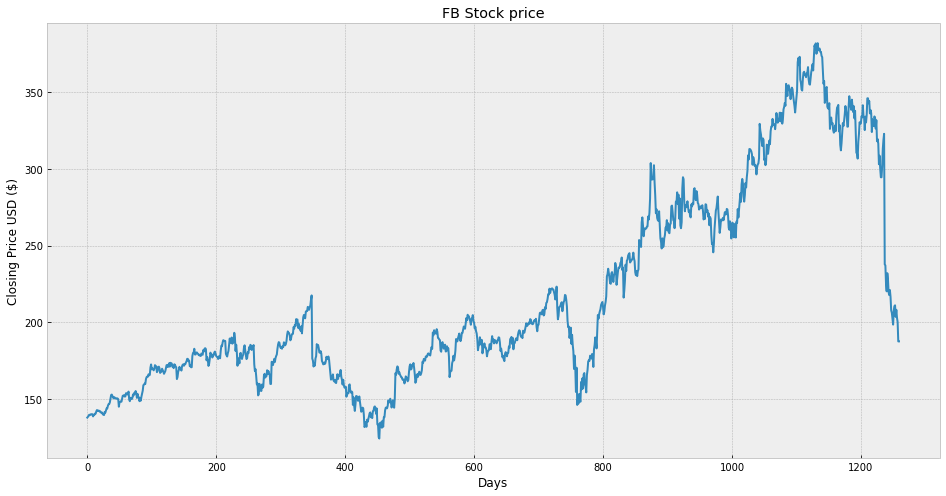

In [51]:
plt.figure(figsize=(16,8))
plt.title('FB Stock price')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [52]:
df = df[['Close']]
df.head(4)

,Close
0,137.720001
1,138.240005
2,138.789993
3,139.600006


In [53]:

future_days = 50
#Create aivariable to predict 'x' days out into the future
df[['Prediction']] = df[['Close']].shift(-future_days)
#Create a new column (target) shifted 'x' units/days up
df.head()

,Close,Prediction
0,137.720001,147.660004
1,138.240005,148.059998
2,138.789993,148.240005
3,139.600006,148.070007
4,139.320007,150.039993


In [54]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[137.720001]
 [138.240005]
 [138.789993]
 ...
 [334.200012]
 [330.450012]
 [335.23999 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [55]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the
y = np.array(df['Prediction'])[:-future_days]
print(y)

[147.660004 148.059998 148.240005 ... 200.059998 187.470001 187.470001]


In [56]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [57]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
lr= LinearRegression().fit(x_train, y_train)

#TEST SVM
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

#TEST POLY
poly_svr = SVR(kernel='poly', C=1.0, degree=1)
poly_svr.fit(x_train, y_train)



SVR(degree=1, kernel='poly')

In [58]:
#TEST CONFINDENCE SCORES FOR ALL 4 MODELS

linearRegression_confidenceScore = lr.score(x_test, y_test)
dt_confidenceScore = tree.score(x_test, y_test)
rbf_confidenceScore = svr_rbf.score(x_test, y_test)
poly_confidenceScore = poly_svr.score(x_test, y_test)
print("Linear Regression confidence: ", linearRegression_confidenceScore)
print("Decision Tree confidence: ", dt_confidenceScore)
print("Radial Basis function confidence: ", rbf_confidenceScore)
print("Polynomial confidence: ", poly_confidenceScore)

Linear Regression confidence:  0.7871883857206579
Decision Tree confidence:  0.757541220454297
Radial Basis function confidence:  0.8266745203089005
Polynomial confidence:  0.7871106431890574


In [59]:
#Get the last x rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[328.529999],
       [324.76001 ],
       [335.339996],
       [339.98999 ],
       [340.779999],
       [341.880005],
       [324.609985],
       [328.690002],
       [315.809998],
       [312.220001],
       [316.920013],
       [323.570007],
       [329.980011],
       [328.079987],
       [331.619995],
       [335.850006],
       [341.130005],
       [338.619995],
       [335.369995],
       [327.640015],
       [327.73999 ],
       [340.890015],
       [347.559998],
       [342.959991],
       [340.769989],
       [338.690002],
       [345.299988],
       [341.01001 ],
       [337.25    ],
       [341.059998],
       [333.119995],
       [338.029999],
       [324.459991],
       [310.600006],
       [310.390015],
       [306.839996],
       [317.869995],
       [322.809998],
       [330.559998],
       [329.820007],
       [329.75    ],
       [334.48999 ],
       [333.73999 ],
       [341.660004],
       [334.899994],
       [333.790009],
       [325.450012],
       [334.2

In [60]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

#TEST SVM
svm_prediction = svr_rbf.predict(x_future)
print(svm_prediction)

#TEST POLY
poly_prediction = poly_svr.predict(x_future)
print(svm_prediction)

[324.170013 346.220001 342.940002 344.359985 336.350006 275.319992
 336.529999 324.170013 332.459991 331.790009 328.070007 334.369995
 325.450012 326.480011 331.899994 318.149994 319.589996 316.559998
 342.940002 363.51001  362.970001 294.630005 294.640015 334.48999
 336.350006 319.       323.       224.910004 340.649994 224.910004
 341.660004 232.       228.070007 219.550003 217.699997 221.
 216.539993 347.630005 206.160004 202.080002 198.449997 207.600006
 210.479996 275.319992 187.470001 208.110001 334.200012 200.059998
 187.470001 187.470001]
[320.86340638 317.54009    326.86654713 330.96560452 331.66201235
 332.63168837 317.40784013 321.00445204 309.65048567 306.48583563
 310.62898482 316.49107991 322.1416193  320.46671232 323.58729611
 327.31613056 331.97054923 329.75792809 326.89299182 320.0788687
 320.16699855 331.75899352 337.6387093  333.5837164  331.65318834
 329.81964058 335.64646787 331.86477138 328.55025167 331.90883674
 324.9095744  329.2378355  317.27561759 305.05777949

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


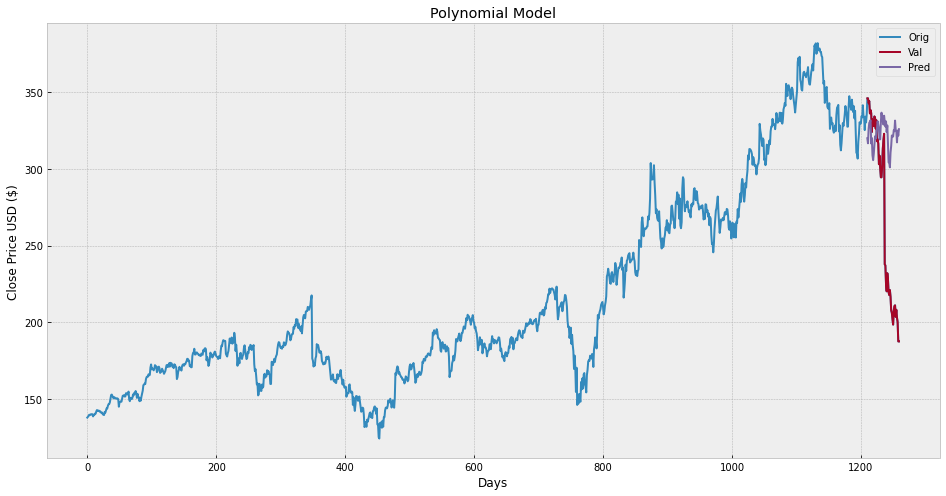

In [61]:
predictions = poly_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Polynomial Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


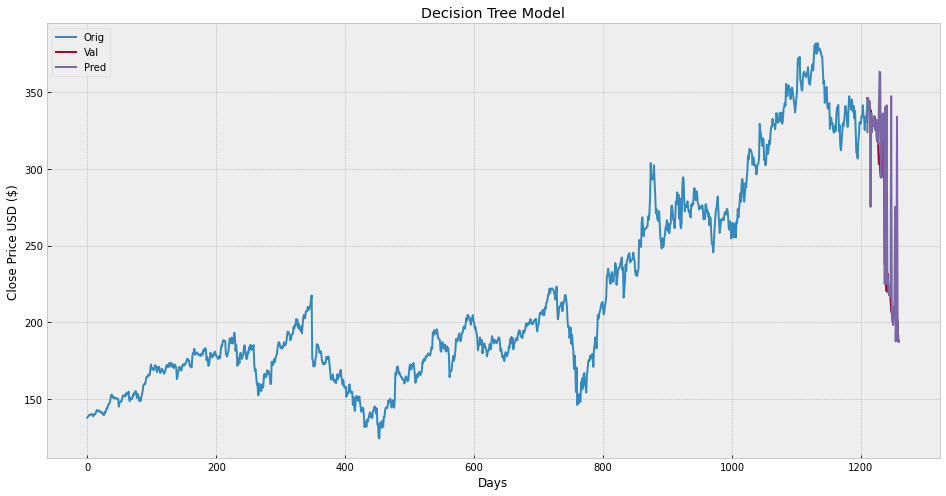

In [62]:
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


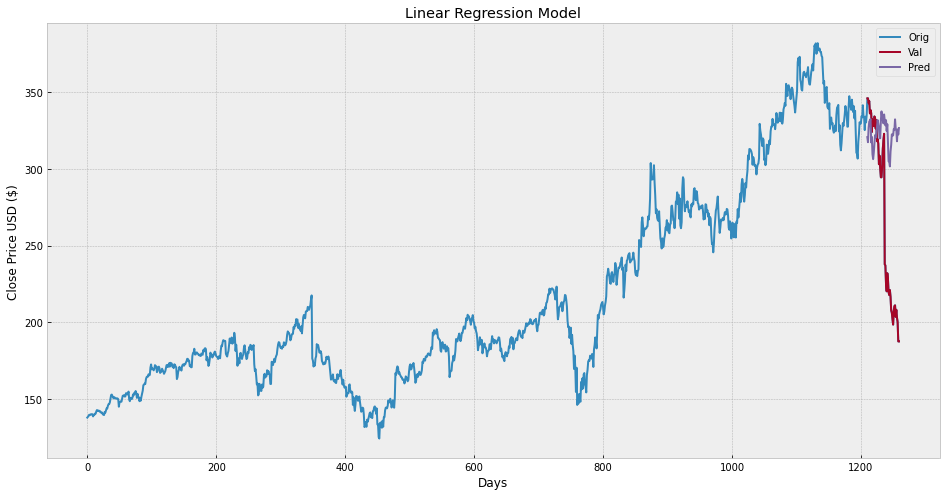

In [63]:
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


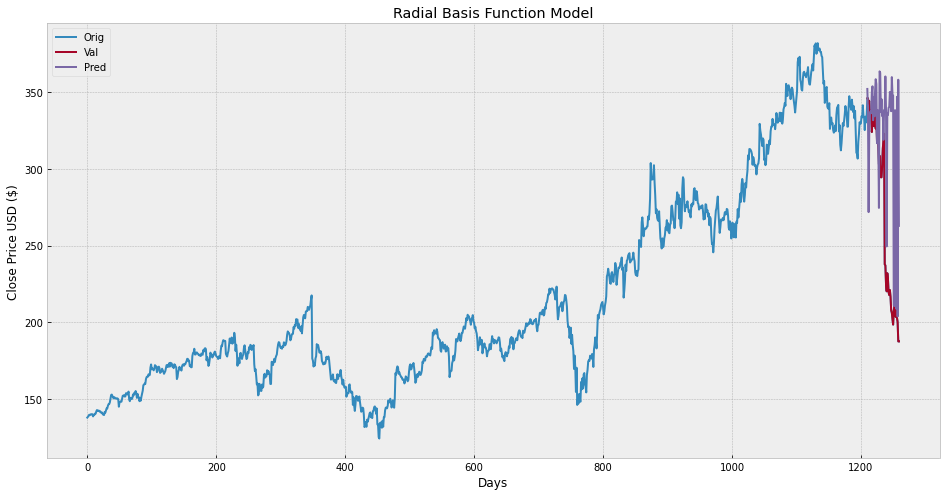

In [64]:
predictions = svm_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Radial Basis Function Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()